In [4]:
import os

from sklearn.metrics import accuracy_score

from sktime.benchmarking.data import UEADataset, make_datasets
from sktime.benchmarking.evaluation import Evaluator
from sktime.benchmarking.metrics import PairwiseMetric
from sktime.benchmarking.orchestration import Orchestrator
from sktime.benchmarking.results import HDDResults
from sktime.benchmarking.strategies import TSCStrategy
from sktime.benchmarking.tasks import TSCTask
from sktime.classification.interval_based import (
    RandomIntervalSpectralEnsemble,
    TimeSeriesForestClassifier
)
from sktime.series_as_features.model_selection import PresplitFilesCV

In [15]:
import sktime

DATA_PATH = os.path.join(os.path.dirname(sktime.__file__), "datasets/data")
RESULT_PATH = "results"

In [16]:
datasets = [
    UEADataset(path=DATA_PATH, name="ArrowHead"),
    UEADataset(path=DATA_PATH, name="ItalyPowerDemand")
]

In [17]:
datasets = make_datasets(
    path=DATA_PATH, dataset_cls=UEADataset, names=["ArrowHead", "ItalyPowerDemand"]
)

In [18]:
tasks = [TSCTask(target="target") for _ in range(len(datasets))]
tasks

[TSCTask(features=None, metadata=None, target='target'),
 TSCTask(features=None, metadata=None, target='target')]

In [19]:
strategies = [
    TSCStrategy(TimeSeriesForestClassifier(n_estimators=10), name="tsf"),
    TSCStrategy(RandomIntervalSpectralEnsemble(n_estimators=10), name="rise")
]

In [20]:
results = HDDResults(path=RESULT_PATH)

In [22]:
orchestrator = Orchestrator(
    datasets=datasets,
    tasks=tasks,
    strategies=strategies,
    cv=PresplitFilesCV(),
    results=results
)

orchestrator.fit_predict(save_fitted_strategies=False, overwrite_predictions=True)

In [24]:
evaluator = Evaluator(results)
metric = PairwiseMetric(func=accuracy_score, name="accuracy")
metrics_by_strategy = evaluator.evaluate(metric=metric)
metrics_by_strategy

,strategy,accuracy_mean,accuracy_stderr
0,rise,0.836560,0.020454
1,tsf,0.827677,0.020538


In [25]:
evaluator.rank()

,strategy,accuracy_mean_rank
0,rise,1.5
1,tsf,1.5


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'accuracy by strategy'}, xlabel='strategies', ylabel='accuracy'>)

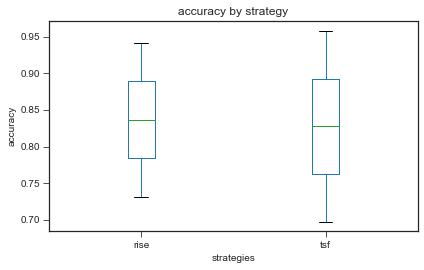

In [26]:
evaluator.plot_boxplots()

In [28]:
evaluator.t_test()

C:\ProgramData\Miniconda3\envs\time_series\lib\site-packages\sktime\benchmarking\evaluation.py:207: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df = t_df.append(t_test, ignore_index=True)
C:\ProgramData\Miniconda3\envs\time_series\lib\site-packages\sktime\benchmarking\evaluation.py:207: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df = t_df.append(t_test, ignore_index=True)
C:\ProgramData\Miniconda3\envs\time_series\lib\site-packages\sktime\benchmarking\evaluation.py:207: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df = t_df.append(t_test, ignore_index=True)
C:\ProgramData\Miniconda3\envs\time_series\lib\site-packages\sktime\benchmarking\evaluation.py:207: FutureWarning: The frame.append method is deprecated and 

(  estimator_1 estimator_2    t_stat     p_val
 0        rise        rise  0.000000  1.000000
 1        rise         tsf  0.052996  0.962553
 2         tsf        rise -0.052996  0.962553
 3         tsf         tsf  0.000000  1.000000,
           rise                 tsf          
         t_stat     p_val    t_stat     p_val
 rise  0.000000  1.000000  0.052996  0.962553
 tsf  -0.052996  0.962553  0.000000  1.000000)

In [29]:
evaluator.sign_test()

C:\ProgramData\Miniconda3\envs\time_series\lib\site-packages\sktime\benchmarking\evaluation.py:248: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sign_df = sign_df.append(sign_test, ignore_index=True)
C:\ProgramData\Miniconda3\envs\time_series\lib\site-packages\sktime\benchmarking\evaluation.py:248: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sign_df = sign_df.append(sign_test, ignore_index=True)
C:\ProgramData\Miniconda3\envs\time_series\lib\site-packages\sktime\benchmarking\evaluation.py:248: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sign_df = sign_df.append(sign_test, ignore_index=True)
C:\ProgramData\Miniconda3\envs\time_series\lib\site-packages\sktime\benchmarking\evaluation.py:248: FutureWarning: The frame.appen

(  estimator_1 estimator_2  p_val
 0        rise        rise    0.5
 1        rise         tsf    1.0
 2         tsf        rise    1.0
 3         tsf         tsf    0.5,
 estimator_2  rise  tsf
 estimator_1           
 rise          0.5  1.0
 tsf           1.0  0.5)

In [30]:
evaluator.ranksum_test()

C:\ProgramData\Miniconda3\envs\time_series\lib\site-packages\sktime\benchmarking\evaluation.py:281: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ranksum_df = ranksum_df.append(ranksum, ignore_index=True)
C:\ProgramData\Miniconda3\envs\time_series\lib\site-packages\sktime\benchmarking\evaluation.py:281: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ranksum_df = ranksum_df.append(ranksum, ignore_index=True)
C:\ProgramData\Miniconda3\envs\time_series\lib\site-packages\sktime\benchmarking\evaluation.py:281: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ranksum_df = ranksum_df.append(ranksum, ignore_index=True)
C:\ProgramData\Miniconda3\envs\time_series\lib\site-packages\sktime\benchmarking\evaluation.py:281: FutureWarning: The

(  estimator_1 estimator_2  t_stat  p_val
 0        rise        rise     0.0    1.0
 1        rise         tsf     0.0    1.0
 2         tsf        rise     0.0    1.0
 3         tsf         tsf     0.0    1.0,
        rise          tsf      
      t_stat p_val t_stat p_val
 rise    0.0   1.0    0.0   1.0
 tsf     0.0   1.0    0.0   1.0)

In [31]:
evaluator.t_test_with_bonferroni_correction()

C:\ProgramData\Miniconda3\envs\time_series\lib\site-packages\sktime\benchmarking\evaluation.py:207: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df = t_df.append(t_test, ignore_index=True)
C:\ProgramData\Miniconda3\envs\time_series\lib\site-packages\sktime\benchmarking\evaluation.py:207: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df = t_df.append(t_test, ignore_index=True)
C:\ProgramData\Miniconda3\envs\time_series\lib\site-packages\sktime\benchmarking\evaluation.py:207: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df = t_df.append(t_test, ignore_index=True)
C:\ProgramData\Miniconda3\envs\time_series\lib\site-packages\sktime\benchmarking\evaluation.py:207: FutureWarning: The frame.append method is deprecated and 

,rise,tsf
rise,False,False
tsf,False,False


In [32]:
evaluator.wilcoxon_test()

C:\ProgramData\Miniconda3\envs\time_series\lib\site-packages\sktime\benchmarking\evaluation.py:353: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wilcoxon_df = wilcoxon_df.append(w_test, ignore_index=True)


,estimator_1,estimator_2,statistic,p_val
0,rise,tsf,1.0,1.0


In [34]:
evaluator.nemenyi()

,rise,tsf
rise,1.0,1.0
tsf,1.0,1.0


In [36]:
import pandas as pd

df = pd.read_csv("results/tsf/ArrowHead/tsf_test_0.csv")
df

,index,y_true,y_pred,fit_estimator_start_time,fit_estimator_end_time,predict_estimator_start_time,predict_estimator_end_time
0,36,0,0,2022-04-03 11:06:32.340581,2022-04-03 11:06:32.442372,2022-04-03 11:06:32.442372,2022-04-03 11:06:32.731220
1,37,0,2,2022-04-03 11:06:32.340581,2022-04-03 11:06:32.442372,2022-04-03 11:06:32.442372,2022-04-03 11:06:32.731220
2,38,0,0,2022-04-03 11:06:32.340581,2022-04-03 11:06:32.442372,2022-04-03 11:06:32.442372,2022-04-03 11:06:32.731220
3,39,0,0,2022-04-03 11:06:32.340581,2022-04-03 11:06:32.442372,2022-04-03 11:06:32.442372,2022-04-03 11:06:32.731220
4,40,0,0,2022-04-03 11:06:32.340581,2022-04-03 11:06:32.442372,2022-04-03 11:06:32.442372,2022-04-03 11:06:32.731220
...,...,...,...,...,...,...,...
170,206,2,2,2022-04-03 11:06:32.340581,2022-04-03 11:06:32.442372,2022-04-03 11:06:32.442372,2022-04-03 11:06:32.731220
171,207,2,2,2022-04-03 11:06:32.340581,2022-04-03 11:06:32.442372,2022-04-03 11:06:32.442372,2022-04-03 11:06:32.731220
172,208,2,1,2022-04-03 11:06:32.340581,2022-04-03 11:06:32.442372,2022-04-03 11:06:32.442372,2022-04-03 11:06:32.731220
173,209,2,2,2022-04-03 11:06:32.340581,2022-04-03 11:06:32.442372,2022-04-03 11:06:32.442372,2022-04-03 11:06:32.731220


In [38]:
UEADataset()

ValueError: No dataset found at path: .\uea\uea_TRAIN.ts